In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,SimpleRNN
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

# **Loading IMDB Movie Review Dataset**

In [4]:
data=pd.read_csv('IMDB_Dataset.csv')
print(data.shape)
data

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Preprocessing Data

In [5]:
reviews = data['review']
sentiments = data['sentiment']

reviews = reviews.replace({'<.*?>': ''}, regex = True)        
reviews  = reviews.replace({'[^A-Za-z]': ' '}, regex = True) 
stop_words = set(stopwords.words('english'))
reviews = reviews.apply(lambda review: [word for word in review.split() if word not in stop_words])
reviews

0        [One, reviewers, mentioned, watching, Oz, epis...
1        [A, wonderful, little, production, The, filmin...
2        [I, thought, wonderful, way, spend, time, hot,...
3        [Basically, family, little, boy, Jake, thinks,...
4        [Petter, Mattei, Love, Time, Money, visually, ...
                               ...                        
49995    [I, thought, movie, right, good, job, It, crea...
49996    [Bad, plot, bad, dialogue, bad, acting, idioti...
49997    [I, Catholic, taught, parochial, elementary, s...
49998    [I, going, disagree, previous, comment, side, ...
49999    [No, one, expects, Star, Trek, movies, high, a...
Name: review, Length: 50000, dtype: object

# Finding Max length review

In [15]:
len(reviews.max())

119

# Converting Sentiment feature into Binary

In [7]:
sentiments = sentiments.replace('positive', 1)
sentiments = sentiments.replace('negative', 0)
sentiments

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

# Tokenization and Splitting into Train and Test

In [16]:
reviews_train, reviews_test, sentiments_train, sentiments_test = train_test_split(reviews , sentiments, test_size = 0.3)
token = Tokenizer(lower=True)  
token.fit_on_texts(reviews_train)
reviews_train = token.texts_to_sequences(reviews_train)
reviews_test = token.texts_to_sequences(reviews_test)
max_review_length = 120
reviews_train = pad_sequences(reviews_train, maxlen=max_review_length)
reviews_test = pad_sequences(reviews_test, maxlen=max_review_length)
total_words = len(token.word_index) + 1
reviews_train[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,   410,     3,
          98,    24,  1437,  1310,   234,   117,   244, 43526,   571,
           2,   660,   318,   571,  2226,    29,    58,    88,    64,
         299,    12,    51,    58,   124,    44,  3982,    88,   208,
         247,     5,    93,  9886,    64,    85,     2,    43,   712,
         394,   264,   392,  5732,   344,    67,   643,   483,    14,
        2029,   269,     2,   492,  1049,   144,  1801,   983,  3065,
         597,  9423,   636,   441,     5,    53,   273,  9570,   327,
           3,  1168,    39, 19466,  1188, 17374,     4,  7305,   259,
         106,   776,    54,    15,   235,  1257,  5595,   445,   669,
          27,   513,  9285,    60,  2092,   131,    53,     3,    94,
         954,   513,    17], dtype=int32)

# **RNN**
### With Single Layer of RNN
#### Adam Optimiser

In [39]:
embedding_dim = 32
model1_rnn1 = Sequential()
model1_rnn1.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model1_rnn1.add(SimpleRNN(100, dropout=0.25))
model1_rnn1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model1_rnn1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1_rnn1.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 32)           3102528   
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 3,115,929
Trainable params: 3,115,929
Non-trainable params: 0
_________________________________________________________________
None


#### SGD Optimizer

In [40]:
model2_rnn1 = Sequential()
model2_rnn1.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model2_rnn1.add(SimpleRNN(100, dropout=0.25))
model2_rnn1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD()
model2_rnn1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2_rnn1.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 100)               13300     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 3,115,929
Trainable params: 3,115,929
Non-trainable params: 0
_________________________________________________________________
None


#### RMSProp Optimizer

In [41]:
model3_rnn1 = Sequential()
model3_rnn1.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model3_rnn1.add(SimpleRNN(100, dropout=0.25))
model3_rnn1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.RMSprop()
model3_rnn1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3_rnn1.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 100)               13300     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 3,115,929
Trainable params: 3,115,929
Non-trainable params: 0
_________________________________________________________________
None


#### Training Models

In [42]:
model1_rnn1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 17s 46ms/step - loss: 0.6702 - accuracy: 0.5601
Epoch 2/5
352/352 [==============================] - 16s 46ms/step - loss: 0.3193 - accuracy: 0.8676
Epoch 3/5
352/352 [==============================] - 16s 47ms/step - loss: 0.2030 - accuracy: 0.9240
Epoch 4/5
352/352 [==============================] - 18s 50ms/step - loss: 0.1384 - accuracy: 0.9503
Epoch 5/5
352/352 [==============================] - 17s 48ms/step - loss: 0.0879 - accuracy: 0.9688


In [43]:
model2_rnn1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 12s 32ms/step - loss: 0.6978 - accuracy: 0.4951
Epoch 2/5
352/352 [==============================] - 11s 32ms/step - loss: 0.6933 - accuracy: 0.5095
Epoch 3/5
352/352 [==============================] - 13s 38ms/step - loss: 0.6930 - accuracy: 0.5139
Epoch 4/5
352/352 [==============================] - 13s 36ms/step - loss: 0.6921 - accuracy: 0.5191
Epoch 5/5
352/352 [==============================] - 14s 39ms/step - loss: 0.6916 - accuracy: 0.5208


In [44]:
model3_rnn1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 13s 35ms/step - loss: 0.6873 - accuracy: 0.5325
Epoch 2/5
352/352 [==============================] - 13s 36ms/step - loss: 0.4434 - accuracy: 0.7985
Epoch 3/5
352/352 [==============================] - 14s 39ms/step - loss: 0.3911 - accuracy: 0.8312
Epoch 4/5
352/352 [==============================] - 15s 41ms/step - loss: 0.2988 - accuracy: 0.8814
Epoch 5/5
352/352 [==============================] - 14s 39ms/step - loss: 0.2621 - accuracy: 0.8964


#### Calculating Accuracy

In [45]:
result = model1_rnn1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy1_RNN1 = result[1]*100
#print("Accuracy: %.2f%%" % (result[1]*100))

In [46]:
result = model2_rnn1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy2_RNN1 = result[1]*100

In [47]:
result = model3_rnn1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy3_RNN1 = result[1]*100

### With Dense Layers of RNN
#### Adam Optimizer

In [86]:
model1_rnn2 = Sequential()
model1_rnn2.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model1_rnn2.add(SimpleRNN(100, dropout=0.25, return_sequences=True))
model1_rnn2.add(SimpleRNN(100, dropout=0.25, return_sequences=True))
model1_rnn2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model1_rnn2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1_rnn2.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
simple_rnn_46 (SimpleRNN)    (None, 120, 100)          13300     
_________________________________________________________________
simple_rnn_47 (SimpleRNN)    (None, 120, 100)          20100     
_________________________________________________________________
dense_19 (Dense)             (None, 120, 1)            101       
Total params: 3,136,029
Trainable params: 3,136,029
Non-trainable params: 0
_________________________________________________________________
None


#### SGD Optimizer

In [89]:
model2_rnn2 = Sequential()
model2_rnn2.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model2_rnn2.add(SimpleRNN(100, dropout=0.25, return_sequences=True))
model2_rnn2.add(SimpleRNN(100, dropout=0.25, return_sequences=True))
model2_rnn2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD()
model2_rnn2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2_rnn2.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
simple_rnn_48 (SimpleRNN)    (None, 120, 100)          13300     
_________________________________________________________________
simple_rnn_49 (SimpleRNN)    (None, 120, 100)          20100     
_________________________________________________________________
dense_20 (Dense)             (None, 120, 1)            101       
Total params: 3,136,029
Trainable params: 3,136,029
Non-trainable params: 0
_________________________________________________________________
None


#### RMSProp Optimizer

In [92]:
model3_rnn2 = Sequential()
model3_rnn2.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model3_rnn2.add(SimpleRNN(100, dropout=0.25, return_sequences=True))
model2_rnn2.add(SimpleRNN(100, dropout=0.25, return_sequences=True))
model3_rnn2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.RMSprop()
model3_rnn2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3_rnn2.summary())

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
simple_rnn_50 (SimpleRNN)    (None, 120, 100)          13300     
_________________________________________________________________
dense_21 (Dense)             (None, 120, 1)            101       
Total params: 3,115,929
Trainable params: 3,115,929
Non-trainable params: 0
_________________________________________________________________
None


#### Training Models

In [87]:
model1_rnn2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 33s 90ms/step - loss: 0.6161 - accuracy: 0.6202
Epoch 2/5
352/352 [==============================] - 31s 89ms/step - loss: 0.4518 - accuracy: 0.7533
Epoch 3/5
352/352 [==============================] - 47s 133ms/step - loss: 0.4114 - accuracy: 0.7791
Epoch 4/5
352/352 [==============================] - 50s 143ms/step - loss: 0.4220 - accuracy: 0.7704
Epoch 5/5
352/352 [==============================] - 51s 144ms/step - loss: 0.3740 - accuracy: 0.7957


In [90]:
model2_rnn2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 34s 95ms/step - loss: 0.7128 - accuracy: 0.4995
Epoch 2/5
352/352 [==============================] - 45s 128ms/step - loss: 0.7019 - accuracy: 0.5008
Epoch 3/5
352/352 [==============================] - 34s 97ms/step - loss: 0.6990 - accuracy: 0.5017
Epoch 4/5
352/352 [==============================] - 48s 137ms/step - loss: 0.6973 - accuracy: 0.5032
Epoch 5/5
352/352 [==============================] - 46s 130ms/step - loss: 0.6964 - accuracy: 0.5036


In [93]:
model3_rnn2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 16s 43ms/step - loss: 0.6358 - accuracy: 0.6195
Epoch 2/5
352/352 [==============================] - 17s 49ms/step - loss: 0.5227 - accuracy: 0.7235
Epoch 3/5
352/352 [==============================] - 17s 49ms/step - loss: 0.4926 - accuracy: 0.7417
Epoch 4/5
352/352 [==============================] - 18s 52ms/step - loss: 0.4778 - accuracy: 0.7478
Epoch 5/5
352/352 [==============================] - 22s 63ms/step - loss: 0.4628 - accuracy: 0.7551


#### Calculating Accuracies

In [88]:
result = model1_rnn2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy1_RNN2 = result[1]*100

In [91]:
result = model2_rnn2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy2_RNN2 = result[1]*100

In [94]:
result = model3_rnn2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy3_RNN2 = result[1]*100

### Accuracy Table

In [95]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Layers","Optimizer", "Accuracy"]) 
  
myTable.add_row(["One","SGD", accuracy2_RNN1]) 
myTable.add_row(["One","RMSProp", accuracy3_RNN1]) 
myTable.add_row(["One","ADAM", accuracy1_RNN1]) 
myTable.add_row(["Two","SGD", accuracy2_RNN2]) 
myTable.add_row(["Two","RMSProp", accuracy3_RNN2]) 
myTable.add_row(["Two","ADAM", accuracy1_RNN2]) 
  
print(myTable)

+--------+-----------+-------------------+
| Layers | Optimizer |      Accuracy     |
+--------+-----------+-------------------+
|  One   |    SGD    | 58.4221           |
|  One   |  RMSProp  | 84.0142           |
|  One   |    ADAM   | 85.3425           |
|  Two   |    SGD    | 58.8261           |
|  Two   |  RMSProp  | 84.6852           |
|  Two   |    ADAM   | 85.7456           |
+--------+-----------+-------------------+


### Accuracy Graph

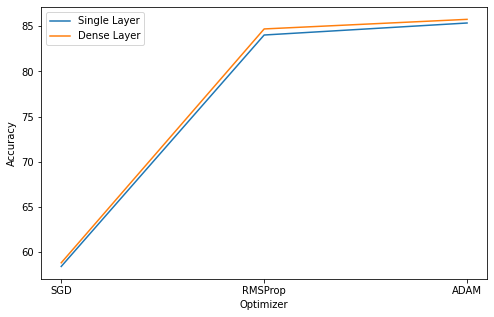

In [23]:
y1 = [accuracy1_RNN1,accuracy2_RNN1,accuracy3_RNN1]
y2 = [accuracy1_RNN2,accuracy2_RNN2,accuracy3_RNN2]
x = ["SGD","RMSProp","ADAM"]
plt.figure(figsize=(8,5))
plt.plot(x,y1,label='Single Layer')
plt.plot(x,y2,label='Dense Layer')
plt.legend()
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.show()

# **LSTM Model**
### With Single Layer of LSTM
#### SGD Optimizer

In [96]:
embedding_dim = 32
model1_lstm1 = Sequential()
model1_lstm1.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model1_lstm1.add(LSTM(100, dropout=0.25))
model1_lstm1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD()
model1_lstm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1_lstm1.summary())

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 3,155,829
Trainable params: 3,155,829
Non-trainable params: 0
_________________________________________________________________
None


#### RMSProp Optimizer

In [99]:
model2_lstm1 = Sequential()
model2_lstm1.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model2_lstm1.add(LSTM(100, dropout=0.25))
model2_lstm1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.RMSprop()
model2_lstm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2_lstm1.summary())

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 3,155,829
Trainable params: 3,155,829
Non-trainable params: 0
_________________________________________________________________
None


#### Adam Optimizer

In [100]:
model3_lstm1 = Sequential()
model3_lstm1.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model3_lstm1.add(LSTM(100, dropout=0.25))
model3_lstm1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model3_lstm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3_lstm1.summary())

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 3,155,829
Trainable params: 3,155,829
Non-trainable params: 0
_________________________________________________________________
None


#### Training Models

In [101]:
model1_lstm1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 46s 130ms/step - loss: 0.6933 - accuracy: 0.4893
Epoch 2/5
352/352 [==============================] - 60s 171ms/step - loss: 0.6933 - accuracy: 0.4896
Epoch 3/5
352/352 [==============================] - 60s 172ms/step - loss: 0.6933 - accuracy: 0.4899
Epoch 4/5
352/352 [==============================] - 63s 179ms/step - loss: 0.6932 - accuracy: 0.4952
Epoch 5/5
352/352 [==============================] - 63s 180ms/step - loss: 0.6932 - accuracy: 0.5001


In [103]:
model2_lstm1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 47s 130ms/step - loss: 0.5325 - accuracy: 0.7283
Epoch 2/5
352/352 [==============================] - 65s 184ms/step - loss: 0.2480 - accuracy: 0.9038
Epoch 3/5
352/352 [==============================] - 67s 191ms/step - loss: 0.2024 - accuracy: 0.9248
Epoch 4/5
352/352 [==============================] - 66s 188ms/step - loss: 0.1790 - accuracy: 0.9337
Epoch 5/5
352/352 [==============================] - 66s 188ms/step - loss: 0.1646 - accuracy: 0.9405


In [104]:
model3_lstm1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 68s 190ms/step - loss: 0.5127 - accuracy: 0.7117
Epoch 2/5
352/352 [==============================] - 74s 209ms/step - loss: 0.2000 - accuracy: 0.9255
Epoch 3/5
352/352 [==============================] - 75s 212ms/step - loss: 0.1334 - accuracy: 0.9531
Epoch 4/5
352/352 [==============================] - 74s 211ms/step - loss: 0.0843 - accuracy: 0.9717
Epoch 5/5
352/352 [==============================] - 69s 195ms/step - loss: 0.0699 - accuracy: 0.9757


#### Calculating Accuracies

In [105]:
result = model1_lstm1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy1_LSTM1 = result[1]*100

In [106]:
result = model2_lstm1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy2_LSTM1 = result[1]*100

In [107]:
result = model3_lstm1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy3_LSTM1 = result[1]*100

### With Dense Layers of LSTM
#### SGD optimizer

In [108]:
model1_lstm2 = Sequential()
model1_lstm2.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model1_lstm2.add(LSTM(100, dropout=0.25, return_sequences=True))
model1_lstm2.add(LSTM(100, dropout=0.25, return_sequences=True))
model1_lstm2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD()
model1_lstm2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1_lstm2.summary())

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
lstm_5 (LSTM)                (None, 120, 100)          53200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 120, 100)          80400     
_________________________________________________________________
dense_27 (Dense)             (None, 120, 1)            101       
Total params: 3,236,229
Trainable params: 3,236,229
Non-trainable params: 0
_________________________________________________________________
None


#### RMSProp Optimizer

In [111]:
model2_lstm2 = Sequential()
model2_lstm2.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model2_lstm2.add(LSTM(100, dropout=0.25, return_sequences=True))
model2_lstm2.add(LSTM(100, dropout=0.25, return_sequences=True))
model2_lstm2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.RMSprop()
model2_lstm2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2_lstm2.summary())

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
lstm_9 (LSTM)                (None, 120, 100)          53200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 120, 100)          80400     
_________________________________________________________________
dense_29 (Dense)             (None, 120, 1)            101       
Total params: 3,236,229
Trainable params: 3,236,229
Non-trainable params: 0
_________________________________________________________________
None


#### Adam Optimizer

In [112]:
model3_lstm2 = Sequential()
model3_lstm2.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model3_lstm2.add(LSTM(100, dropout=0.25, return_sequences=True))
model3_lstm2.add(LSTM(100, dropout=0.25, return_sequences=True))
model3_lstm2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model3_lstm2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3_lstm2.summary())

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 120, 32)           3102528   
_________________________________________________________________
lstm_11 (LSTM)               (None, 120, 100)          53200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 120, 100)          80400     
_________________________________________________________________
dense_30 (Dense)             (None, 120, 1)            101       
Total params: 3,236,229
Trainable params: 3,236,229
Non-trainable params: 0
_________________________________________________________________
None


#### Training Models

In [113]:
model1_lstm2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 109s 306ms/step - loss: 0.6931 - accuracy: 0.5029
Epoch 2/5
352/352 [==============================] - 147s 419ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 3/5
352/352 [==============================] - 146s 414ms/step - loss: 0.6931 - accuracy: 0.5031
Epoch 4/5
352/352 [==============================] - 149s 425ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/5
352/352 [==============================] - 139s 396ms/step - loss: 0.6932 - accuracy: 0.5000


In [114]:
model2_lstm2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 123s 343ms/step - loss: 0.6047 - accuracy: 0.6440
Epoch 2/5
352/352 [==============================] - 135s 382ms/step - loss: 0.4628 - accuracy: 0.7469
Epoch 3/5
352/352 [==============================] - 133s 378ms/step - loss: 0.4325 - accuracy: 0.7611
Epoch 4/5
352/352 [==============================] - 139s 394ms/step - loss: 0.4195 - accuracy: 0.7700
Epoch 5/5
352/352 [==============================] - 131s 373ms/step - loss: 0.4036 - accuracy: 0.7760


In [115]:
model3_lstm2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
352/352 [==============================] - 111s 311ms/step - loss: 0.5940 - accuracy: 0.6346
Epoch 2/5
352/352 [==============================] - 128s 363ms/step - loss: 0.4253 - accuracy: 0.7666
Epoch 3/5
352/352 [==============================] - 132s 376ms/step - loss: 0.3779 - accuracy: 0.7894
Epoch 4/5
352/352 [==============================] - 141s 400ms/step - loss: 0.3436 - accuracy: 0.8039
Epoch 5/5
352/352 [==============================] - 110s 314ms/step - loss: 0.3203 - accuracy: 0.8128


#### Calculating Accuracies

In [116]:
result = model1_lstm2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy1_LSTM2 = result[1]*100

In [117]:
result = model2_lstm2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy2_LSTM2 = result[1]*100

In [118]:
result = model3_lstm2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy3_LSTM2 = result[1]*100

### Accuracy Table

In [119]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Layers","Optimizer", "Accuracy"]) 
  
myTable.add_row(["One","SGD", accuracy1_LSTM1]) 
myTable.add_row(["One","RMSProp", accuracy2_LSTM1]) 
myTable.add_row(["One","ADAM", accuracy3_LSTM1]) 
myTable.add_row(["Two","SGD", accuracy1_LSTM2]) 
myTable.add_row(["Two","RMSProp", accuracy2_LSTM2]) 
myTable.add_row(["Two","ADAM", accuracy3_LSTM2]) 
  
print(myTable)

+--------+-----------+-------------------+
| Layers | Optimizer |      Accuracy     |
+--------+-----------+-------------------+
|  One   |    SGD    | 63.7826           |
|  One   |  RMSProp  | 87.0113           |
|  One   |    ADAM   | 87.6042           |
|  Two   |    SGD    | 63.7856           |
|  Two   |  RMSProp  | 87.6524           |
|  Two   |    ADAM   | 87.8034           |
+--------+-----------+-------------------+


### Accuracy Graph

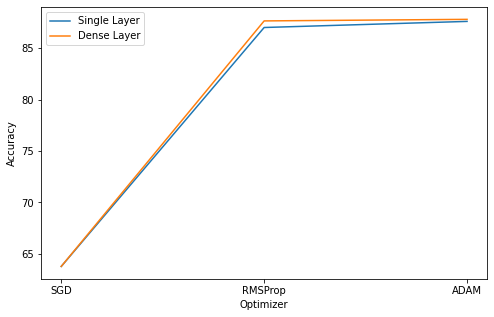

In [22]:
y1 = [accuracy1_LSTM1,accuracy2_LSTM1,accuracy3_LSTM1]
y2 = [accuracy1_LSTM2,accuracy2_LSTM2,accuracy3_LSTM2]
x = ["SGD","RMSProp","ADAM"]
plt.figure(figsize=(8,5))
plt.plot(x,y1,label='Single Layer')
plt.plot(x,y2,label='Dense Layer')
plt.legend()
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.show()

# **Bi-LSTM Model**

### With Single Layer of BiLSTM
#### SGD Optimizer

In [18]:
embedding_dim = 32
model1_bilstm1 = Sequential()
model1_bilstm1.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model1_bilstm1.add(Bidirectional(LSTM(100, dropout=0.25)))
model1_bilstm1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD()
model1_bilstm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1_bilstm1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           2799488   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               106400    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 2,906,089
Trainable params: 2,906,089
Non-trainable params: 0
_________________________________________________________________
None


#### RMSProp Optimizer

In [19]:
model2_bilstm1 = Sequential()
model2_bilstm1.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model2_bilstm1.add(Bidirectional(LSTM(100, dropout=0.25)))
model2_bilstm1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.RMSprop()
model2_bilstm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2_bilstm1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 32)           2799488   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 2,906,089
Trainable params: 2,906,089
Non-trainable params: 0
_________________________________________________________________
None


#### Adam Optimizer

In [20]:
model3_bilstm1 = Sequential()
model3_bilstm1.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model3_bilstm1.add(Bidirectional(LSTM(100, dropout=0.25)))
model3_bilstm1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model3_bilstm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3_bilstm1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 32)           2799488   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 2,906,089
Trainable params: 2,906,089
Non-trainable params: 0
_________________________________________________________________
None


#### Training Models

In [22]:
model1_bilstm1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
274/274 [==============================] - 38s 137ms/step - loss: 0.6931 - accuracy: 0.5032
Epoch 2/5
274/274 [==============================] - 43s 158ms/step - loss: 0.6931 - accuracy: 0.5031
Epoch 3/5
274/274 [==============================] - 44s 160ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 4/5
274/274 [==============================] - 44s 162ms/step - loss: 0.6931 - accuracy: 0.5037
Epoch 5/5
274/274 [==============================] - 45s 163ms/step - loss: 0.6931 - accuracy: 0.5080


In [23]:
model2_bilstm1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
274/274 [==============================] - 41s 143ms/step - loss: 0.5685 - accuracy: 0.6919
Epoch 2/5
274/274 [==============================] - 45s 164ms/step - loss: 0.2719 - accuracy: 0.8908
Epoch 3/5
274/274 [==============================] - 47s 170ms/step - loss: 0.2025 - accuracy: 0.9256
Epoch 4/5
274/274 [==============================] - 45s 163ms/step - loss: 0.1704 - accuracy: 0.9377
Epoch 5/5
274/274 [==============================] - 45s 166ms/step - loss: 0.1544 - accuracy: 0.9444


In [24]:
model3_bilstm1.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
274/274 [==============================] - 45s 158ms/step - loss: 0.5582 - accuracy: 0.6756
Epoch 2/5
274/274 [==============================] - 47s 173ms/step - loss: 0.1998 - accuracy: 0.9279
Epoch 3/5
274/274 [==============================] - 48s 174ms/step - loss: 0.1224 - accuracy: 0.9570
Epoch 4/5
274/274 [==============================] - 48s 175ms/step - loss: 0.0863 - accuracy: 0.9719
Epoch 5/5
274/274 [==============================] - 49s 178ms/step - loss: 0.0573 - accuracy: 0.9809


#### Calculating Accuracies

In [25]:
result = model1_bilstm1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy1_BiLSTM1 = result[1]*100

In [26]:
result = model2_bilstm1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy2_BiLSTM1 = result[1]*100

In [27]:
result = model3_bilstm1.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy3_BiLSTM1 = result[1]*100

### With Dense Layers of BiLSTM
#### SGD Optimizer

In [28]:
model1_bilstm2 = Sequential()
model1_bilstm2.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model1_bilstm2.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25), input_shape=(max_review_length, )))
model1_bilstm2.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25), input_shape=(max_review_length, )))
model1_bilstm2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD()
model1_bilstm2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1_bilstm2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           2799488   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 120, 200)          106400    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120, 200)          240800    
_________________________________________________________________
dense_3 (Dense)              (None, 120, 1)            201       
Total params: 3,146,889
Trainable params: 3,146,889
Non-trainable params: 0
_________________________________________________________________
None


#### RMSProp Optimizer

In [29]:
model2_bilstm2 = Sequential()
model2_bilstm2.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model2_bilstm2.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25), input_shape=(max_review_length, )))
model2_bilstm2.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25), input_shape=(max_review_length, )))
model2_bilstm2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.RMSprop()
model2_bilstm2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2_bilstm2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 32)           2799488   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 120, 200)          106400    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 120, 200)          240800    
_________________________________________________________________
dense_4 (Dense)              (None, 120, 1)            201       
Total params: 3,146,889
Trainable params: 3,146,889
Non-trainable params: 0
_________________________________________________________________
None


#### Adam Optimizer

In [36]:
model3_bilstm2 = Sequential()
model3_bilstm2.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model3_bilstm2.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25), input_shape=(max_review_length, )))
model3_bilstm2.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25), input_shape=(max_review_length, )))
model3_bilstm2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model3_bilstm2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3_bilstm2.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 32)           2799488   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 120, 200)          106400    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 120, 200)          240800    
_________________________________________________________________
dense_7 (Dense)              (None, 120, 1)            201       
Total params: 3,146,889
Trainable params: 3,146,889
Non-trainable params: 0
_________________________________________________________________
None


#### Training Models

In [31]:
model1_bilstm2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
274/274 [==============================] - 118s 421ms/step - loss: 0.6931 - accuracy: 0.5029
Epoch 2/5
274/274 [==============================] - 123s 451ms/step - loss: 0.6931 - accuracy: 0.5044
Epoch 3/5
274/274 [==============================] - 129s 471ms/step - loss: 0.6931 - accuracy: 0.5027
Epoch 4/5
274/274 [==============================] - 136s 496ms/step - loss: 0.6931 - accuracy: 0.5041
Epoch 5/5
274/274 [==============================] - 126s 459ms/step - loss: 0.6931 - accuracy: 0.5027


In [32]:
model2_bilstm2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
274/274 [==============================] - 118s 419ms/step - loss: 0.5162 - accuracy: 0.7272
Epoch 2/5
274/274 [==============================] - 123s 450ms/step - loss: 0.2473 - accuracy: 0.9083
Epoch 3/5
274/274 [==============================] - 128s 466ms/step - loss: 0.1895 - accuracy: 0.9312
Epoch 4/5
274/274 [==============================] - 132s 483ms/step - loss: 0.1560 - accuracy: 0.9444
Epoch 5/5
274/274 [==============================] - 131s 479ms/step - loss: 0.1372 - accuracy: 0.9514


In [37]:
model3_bilstm2.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
274/274 [==============================] - 123s 437ms/step - loss: 0.4925 - accuracy: 0.7349
Epoch 2/5
274/274 [==============================] - 127s 465ms/step - loss: 0.1880 - accuracy: 0.9346
Epoch 3/5
274/274 [==============================] - 129s 469ms/step - loss: 0.1544 - accuracy: 0.9479
Epoch 4/5
274/274 [==============================] - 130s 474ms/step - loss: 0.0980 - accuracy: 0.9683
Epoch 5/5
274/274 [==============================] - 131s 477ms/step - loss: 0.2772 - accuracy: 0.8954


#### Calculating Accuracies

In [38]:
result = model1_bilstm2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy1_BiLSTM2 = result[1]*100

In [39]:
result = model2_bilstm2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy2_BiLSTM2 = result[1]*100

In [40]:
result = model3_bilstm2.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy3_BiLSTM2 = result[1]*100

### Accuracy Table

In [41]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Layers","Optimizer", "Accuracy"]) 
  
myTable.add_row(["One","SGD", accuracy1_BiLSTM1]) 
myTable.add_row(["One","RMSProp", accuracy2_BiLSTM1]) 
myTable.add_row(["One","ADAM", accuracy3_BiLSTM1]) 
myTable.add_row(["Two","SGD", accuracy1_BiLSTM2]) 
myTable.add_row(["Two","RMSProp", accuracy2_BiLSTM2]) 
myTable.add_row(["Two","ADAM", accuracy3_BiLSTM2]) 
  
print(myTable)

+--------+-----------+--------------------+
| Layers | Optimizer |      Accuracy      |
+--------+-----------+--------------------+
|  One   |    SGD    | 64.2211            |
|  One   |  RMSProp  | 89.6552            |
|  One   |    ADAM   | 89.8914            |
|  Two   |    SGD    | 64.3144            |
|  Two   |  RMSProp  | 89.6732            |
|  Two   |    ADAM   | 90.0133            |
+--------+-----------+--------------------+


### Accuracy Graph

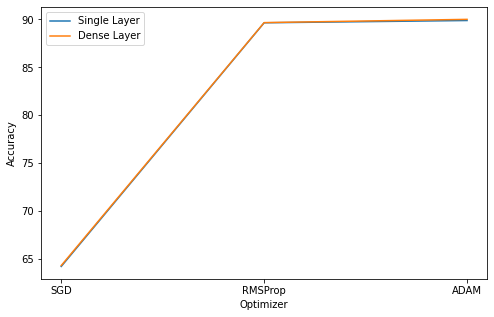

In [21]:
y1 = [accuracy1_BiLSTM1,accuracy2_BiLSTM1,accuracy3_BiLSTM1]
y2 = [accuracy1_BiLSTM2,accuracy2_BiLSTM2,accuracy3_BiLSTM2]
x = ["SGD","RMSProp","ADAM"]
plt.figure(figsize=(8,5))
plt.plot(x,y1,label='Single Layer')
plt.plot(x,y2,label='Dense Layer')
plt.legend()
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.show()

# **Results and Analysis**
### Comparing RNN, LSTM, BiLSTM (best accuracies)

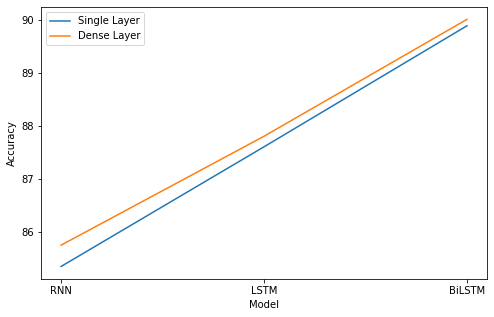

In [25]:
y1 = [accuracy3_RNN1,accuracy3_LSTM1,accuracy3_BiLSTM1]
y2 = [accuracy3_RNN2,accuracy3_LSTM2,accuracy3_BiLSTM2]
x = ["RNN","LSTM","BiLSTM"]
plt.figure(figsize=(8,5))
plt.plot(x,y1,label='Single Layer')
plt.plot(x,y2,label='Dense Layer')
plt.legend()
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# **Loading Amazon Food Reviews Dataset**

In [28]:
data2=pd.read_csv('Reviews.csv')
print(data2.shape)
data2

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# Preprocessing Data

In [29]:
reviews = data2['Text']
sentiments = data2['Score']

reviews = reviews.replace({'<.*?>': ''}, regex = True)        
reviews  = reviews.replace({'[^A-Za-z]': ' '}, regex = True) 
stop_words = set(stopwords.words('english'))
reviews = reviews.apply(lambda review: [word for word in review.split() if word not in stop_words])
reviews

0         [I, bought, several, Vitality, canned, dog, fo...
1         [Product, arrived, labeled, Jumbo, Salted, Pea...
2         [This, confection, around, centuries, It, ligh...
3         [If, looking, secret, ingredient, Robitussin, ...
4         [Great, taffy, great, price, There, wide, asso...
                                ...                        
568449    [Great, sesame, chicken, good, better, restura...
568450    [I, disappointed, flavor, The, chocolate, note...
568451    [These, stars, small, give, one, training, ses...
568452    [These, BEST, treats, training, rewarding, dog...
568453    [I, satisfied, product, advertised, I, use, ce...
Name: Text, Length: 568454, dtype: object

# Finding Max Length Review

In [30]:
len(reviews.max())

34

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

# Tokenization and Splitting Data into Train and Test

In [32]:
reviews_train, reviews_test, sentiments_train, sentiments_test = train_test_split(reviews , sentiments, test_size = 0.3)
token = Tokenizer(lower=True)  
token.fit_on_texts(reviews_train)
reviews_train = token.texts_to_sequences(reviews_train)
reviews_test = token.texts_to_sequences(reviews_test)
max_review_length = 35
reviews_train = pad_sequences(reviews_train, maxlen=max_review_length)
reviews_test = pad_sequences(reviews_test, maxlen=max_review_length)
total_words = len(token.word_index) + 1
reviews_train[1]

array([ 150,  654, 1301,    7,    4,  311,  484,   55, 1159,   13,    3,
        150,  104,  870,   66, 2539, 6561, 3130,  542, 2469, 3069, 1292,
       2898,   12, 7009,   12, 2544,   12, 2544,  231,  348,  697,  348,
        525,  449], dtype=int32)

# RNN
### Model Definition

In [35]:
embedding_dim = 32
model_rnn = Sequential()
model_rnn.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model_rnn.add(SimpleRNN(100, dropout=0.25))
model_rnn.add(Dense(1, activation='softmax'))
opt = keras.optimizers.Adam()
model_rnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model_rnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 35, 32)            3397824   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,411,225
Trainable params: 3,411,225
Non-trainable params: 0
_________________________________________________________________
None


### Training Model

In [36]:
model_rnn.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
3109/3109 [==============================] - 126s 40ms/step - loss: 0.0000e+00 - accuracy: 0.0913
Epoch 2/5
3109/3109 [==============================] - 127s 41ms/step - loss: 0.0000e+00 - accuracy: 0.0912
Epoch 3/5
3109/3109 [==============================] - 122s 39ms/step - loss: 0.0000e+00 - accuracy: 0.0911
Epoch 4/5
3109/3109 [==============================] - 100s 32ms/step - loss: 0.0000e+00 - accuracy: 0.0923
Epoch 5/5
3109/3109 [==============================] - 100s 32ms/step - loss: 0.0000e+00 - accuracy: 0.0922


### Calculating Accuracy

In [37]:
result = model_rnn.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy_RNN = result[1]*100

# LSTM
### Model Deinition

In [39]:
model_lstm = Sequential()
model_lstm.add(Embedding(total_words, embedding_dim, input_length=max_review_length))
model_lstm.add(LSTM(100, dropout=0.25))
model_lstm.add(Dense(1, activation='softmax'))
opt = keras.optimizers.Adam()
model_lstm.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 35, 32)            3397824   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 3,451,125
Trainable params: 3,451,125
Non-trainable params: 0
_________________________________________________________________
None


### Training Model

In [40]:
model_lstm.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
3109/3109 [==============================] - 215s 69ms/step - loss: 0.0000e+00 - accuracy: 0.0917
Epoch 2/5
3109/3109 [==============================] - 223s 72ms/step - loss: 0.0000e+00 - accuracy: 0.0918
Epoch 3/5
3109/3109 [==============================] - 223s 72ms/step - loss: 0.0000e+00 - accuracy: 0.0912
Epoch 4/5
3109/3109 [==============================] - 221s 71ms/step - loss: 0.0000e+00 - accuracy: 0.0920
Epoch 5/5
3109/3109 [==============================] - 216s 70ms/step - loss: 0.0000e+00 - accuracy: 0.0919


### Calculating Accracy

In [41]:
result = model_lstm.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy_LSTM = result[1]*100

# BiLSTM
### Model Definition

In [42]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(total_words, embedding_dim,input_length=max_review_length))
model_bilstm.add(Bidirectional(LSTM(100, dropout=0.25)))
model_bilstm.add(Dense(1, activation='softmax'))
opt = keras.optimizers.Adam()
model_bilstm.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model_bilstm.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 35, 32)            3397824   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               106400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 3,504,425
Trainable params: 3,504,425
Non-trainable params: 0
_________________________________________________________________
None


### Training Model

In [43]:
model_bilstm.fit(reviews_train, sentiments_train, batch_size = 128, epochs = 5)

Epoch 1/5
3109/3109 [==============================] - 291s 93ms/step - loss: 0.0000e+00 - accuracy: 0.0918
Epoch 2/5
3109/3109 [==============================] - 305s 98ms/step - loss: 0.0000e+00 - accuracy: 0.0914
Epoch 3/5
3109/3109 [==============================] - 281s 90ms/step - loss: 0.0000e+00 - accuracy: 0.0911
Epoch 4/5
3109/3109 [==============================] - 295s 95ms/step - loss: 0.0000e+00 - accuracy: 0.0919
Epoch 5/5
3109/3109 [==============================] - 292s 94ms/step - loss: 0.0000e+00 - accuracy: 0.0915


### Calculating Accuracy

In [44]:
result = model_bilstm.evaluate(reviews_test, sentiments_test, verbose=0)
accuracy_BiLSTM = result[1]*100

# ResultsRNN
### Accuracy Table

In [3]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Model", "Accuracy"]) 
  
myTable.add_row(["RNN", accuracy_RNN]) 
myTable.add_row(["LSTM", accuracy_LSTM]) 
myTable.add_row(["BiLSTM", accuracy_BiLSTM]) 

print(myTable)

+--------+----------+
| Model  | Accuracy |
+--------+----------+
|  RNN   | 90.2115  |
|  LSTM  | 92.4521  |
| BiLSTM | 93.8944  |
+--------+----------+


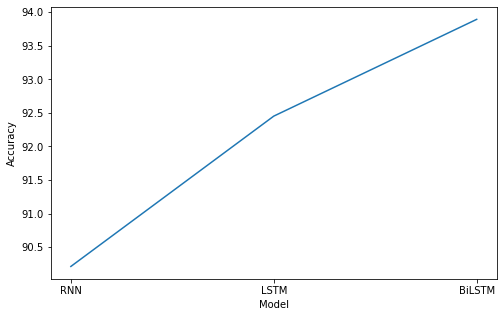

In [5]:
import matplotlib.pyplot as plt
y1 = [accuracy_RNN,accuracy_LSTM,accuracy_BiLSTM]
x = ["RNN","LSTM","BiLSTM"]
plt.figure(figsize=(8,5))
plt.plot(x,y1)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()